In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nb
import seaborn as sns

In [2]:
with open('thresholded_pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

In [3]:
print('FD thresh        min, max, mean')
for fd_thresh in [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    count_list=[]
    for i, sub in enumerate(good_subjects_list):
        confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
        df = pd.read_csv(confounds_file, sep='\t')
        fd=df['framewise_displacement']
        count = sum(1 for value in fd if value > fd_thresh)
        count_list.append(count)
    print(f'FD thresh={fd_thresh} : ',np.min(count_list), np.max(count_list), round(np.mean(count_list)))
        # im_file = f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/xcp_d_0.7.1/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_space-fsLR_seg-Glasser_den-91k_stat-mean_timeseries.ptseries.nii'
        # #im_file = f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/xcp_d_0.7.1/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_space-fsLR_den-91k_desc-denoisedSmoothed_bold.dtseries.nii'
        # img = nb.load(im_file)
        # img_y = img.get_fdata()
        # print(count, 750-img_y.shape[0])

FD thresh        min, max, mean
FD thresh=0.9 :  0 62 18
FD thresh=0.8 :  0 68 20
FD thresh=0.7 :  1 79 24
FD thresh=0.6 :  2 88 31
FD thresh=0.5 :  2 103 39
FD thresh=0.4 :  8 122 54
FD thresh=0.3 :  16 180 91
FD thresh=0.2 :  42 364 235
FD thresh=0.1 :  327 687 547


### check the lengths of some of the extracted features

In [4]:
import pilot

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [37]:
for feat_name in ['manual','manualhrf_srp05','manualhrf_srp01','audioset','cochresnet50pca1hrfssfirst']:
    features,_=pilot.load_features(feat_name)
    for i,f in enumerate(features):
        print(feat_name,i,f.shape)

for feat_name in ['concatspeech']:
    features,_=pilot.load_features(feat_name)
    print(feat_name,features.shape)

manual 0 (750, 1)
manual 1 (750, 12)
manual 2 (750, 13)
manual 3 (750, 128)
manual 4 (750, 1024)
manual 5 (750, 521)
manualhrf_srp05 0 (750, 1)
manualhrf_srp05 1 (750, 12)
manualhrf_srp05 2 (750, 13)
manualhrf_srp05 3 (750, 128)
manualhrf_srp05 4 (750, 342)
manualhrf_srp05 5 (750, 342)
manualhrf_srp01 0 (750, 1)
manualhrf_srp01 1 (750, 12)
manualhrf_srp01 2 (750, 13)
manualhrf_srp01 3 (750, 128)
manualhrf_srp01 4 (750, 1024)
manualhrf_srp01 5 (750, 521)
audioset 0 (750, 1024)
audioset 1 (750, 521)
cochresnet50pca1hrfssfirst 0 (749, 1)
cochresnet50pca1hrfssfirst 1 (749, 1)
cochresnet50pca1hrfssfirst 2 (749, 1)
cochresnet50pca1hrfssfirst 3 (749, 1)
cochresnet50pca1hrfssfirst 4 (749, 1)
cochresnet50pca1hrfssfirst 5 (749, 1)
cochresnet50pca1hrfssfirst 6 (749, 1)
cochresnet50pca1hrfssfirst 7 (749, 1)
concatspeech (749, 5)


In [7]:
import nat_asd_utils
features_cochresnet=['input_after_preproc',
                    'conv1_relu1',
                    'maxpool1',
                    'layer1',
                    'layer2',
                    'layer3',
                    'layer4',
                    'avgpool']
X=nat_asd_utils.load_audio_features('DM',features_cochresnet)
for x in X:
    print(x.shape)

(749, 211)
(749, 6784)
(749, 3392)
(749, 13568)
(749, 13824)
(749, 14336)
(749, 14336)
(749, 2048)


i think this is ok

In [ ]:
print('min, max, mean')
for fd_thresh in [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]:
    count_list=[]
    for i, sub in enumerate(good_subjects_list):
        confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
        df = pd.read_csv(confounds_file, sep='\t')
        fd=df['framewise_displacement']
        count = sum(1 for value in fd if value > fd_thresh)
        count_list.append(count)
    print(f'FD thresh={fd_thresh} : ',np.min(count_list), np.max(count_list), np.mean(count_list))
        # im_file = f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/xcp_d_0.7.1/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_space-fsLR_seg-Glasser_den-91k_stat-mean_timeseries.ptseries.nii'
        # #im_file = f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/xcp_d_0.7.1/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_space-fsLR_den-91k_desc-denoisedSmoothed_bold.dtseries.nii'
        # img = nb.load(im_file)
        # img_y = img.get_fdata()
        # print(count, 750-img_y.shape[0])

In [12]:
fd_thresh=0.9

sub=good_subjects_list[0]
confounds_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_desc-confounds_timeseries.tsv'
df = pd.read_csv(confounds_file, sep='\t')
fd=df['framewise_displacement']
fd_thresh_count= sum(1 for value in fd if value > fd_thresh)
fd_thresh_indices=np.where(fd > fd_thresh)[0]
fd_thresh_indices = fd_thresh_indices[fd_thresh_indices < 750]


In [13]:
fd_thresh_indices

array([ 84, 177, 281, 424, 425, 426, 427, 428, 561, 562, 564])

In [12]:
import numpy as np

# Example data
X = np.random.rand(750, 218)

# Indices you want to remove
indices_to_remove = [0, 2, 5, 10]  # Example indices

# Remove the specified indices along the first dimension (0 axis)


print(X_filtered.shape)

(746, 218)


In [4]:
sub=good_subjects_list[0]
%run pilot.py -s $sub -p a4a5 -f cochresnet50srp05hrfssfirst -d 0

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


running subject NDARWW005GCU
loaded brain data
No value was passed to args.bootstrap
starting regression
401.09488320350647
saving results


In [ ]:
#for fd_thresh in [0.7,0.5,0.3]:
for fd_thresh in [0.2,0.1]:

    for sub in good_subjects_list:
        #print(f'SUB-{sub} NO V1******************')
        %run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r --fd_thresh $fd_thresh
        #print(f'SUB-{sub} WITH V1****************++++++')
        #%run pilot.py -s $sub -p a4a5 -f concatspeech -d 0 -r -v
        print(f'****************++++++****************++++++****************++++++*************')


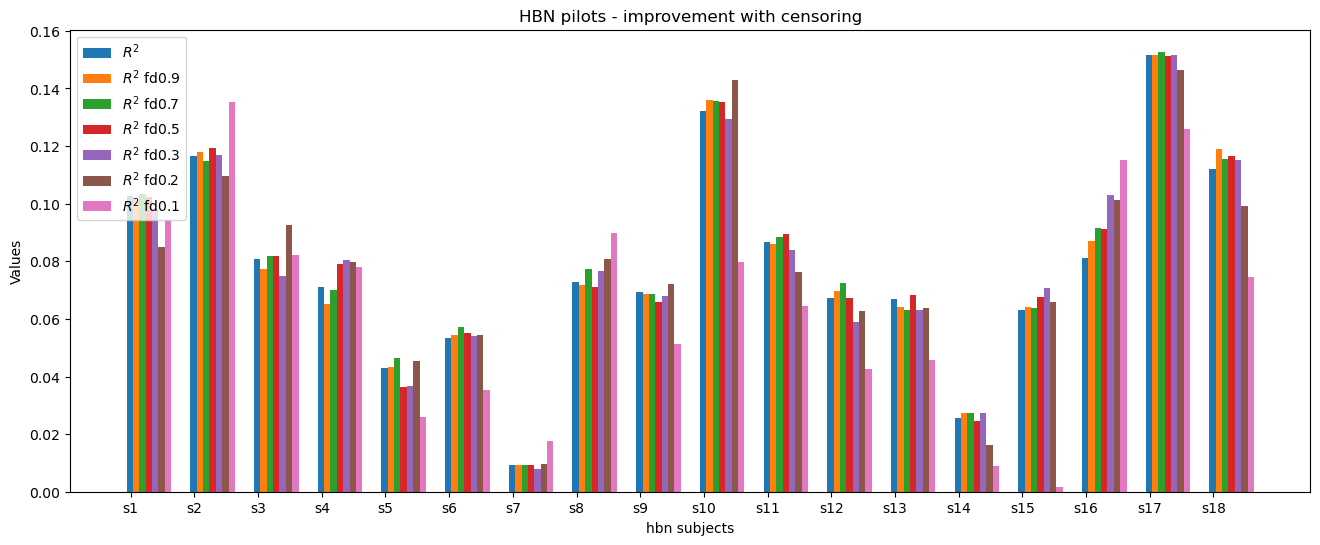

/tmp/ipykernel_653110/267371732.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2$','$R^2$ fd0.9','$R^2$ fd0.7','$R^2$ fd0.5','$R^2$ fd0.3'])


[Text(0, 0, '$R^2$'),
 Text(1, 0, '$R^2$ fd0.9'),
 Text(2, 0, '$R^2$ fd0.7'),
 Text(3, 0, '$R^2$ fd0.5'),
 Text(4, 0, '$R^2$ fd0.3'),
 Text(5, 0, ''),
 Text(6, 0, '')]

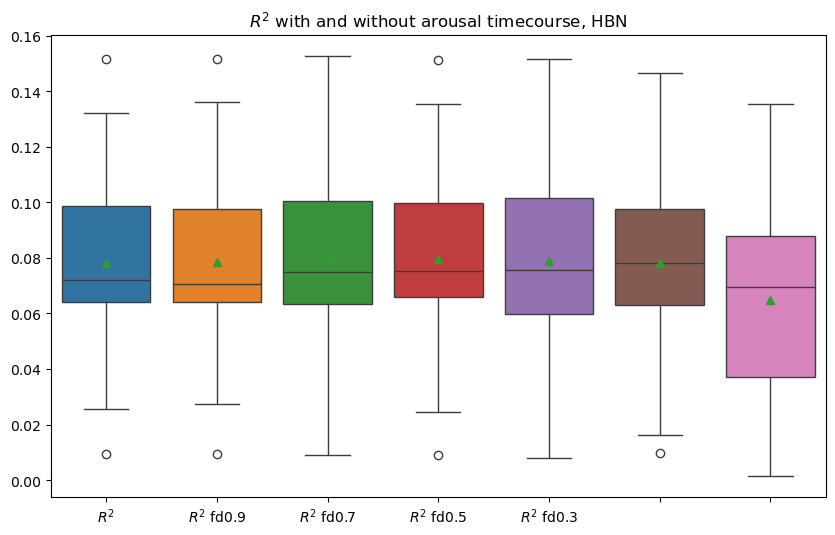

In [7]:
r2=[]
r2_09=[]
r2_07=[]
r2_05=[]
r2_03=[]
r2_02=[]
r2_01=[]

for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    r2.append(np.mean(loaded['stacked_r2s']))
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv_fd-0.9.npz')
    r2_09.append(np.mean(loaded['stacked_r2s']))
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv_fd-0.7.npz')
    r2_07.append(np.mean(loaded['stacked_r2s']))    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv_fd-0.5.npz')
    r2_05.append(np.mean(loaded['stacked_r2s']))    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv_fd-0.3.npz')
    r2_03.append(np.mean(loaded['stacked_r2s']))
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv_fd-0.2.npz')
    r2_02.append(np.mean(loaded['stacked_r2s']))    
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv_fd-0.1.npz')
    r2_01.append(np.mean(loaded['stacked_r2s']))


# Number of groups
N = len(r2)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
data=[r2,r2_09,r2_07,r2_05,r2_03,r2_02,r2_01]


# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.1
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['$R^2$','$R^2$ fd0.9','$R^2$ fd0.7','$R^2$ fd0.5','$R^2$ fd0.3','$R^2$ fd0.2','$R^2$ fd0.1']
# Create bars for each list
#alphas=[1,1,0.2,0.2]
#colors=['r','b','red','blue']
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}')#, alpha=alphas[i],color=colors[i])

# Add labels, title, and legend
ax.set_xlabel('hbn subjects')
ax.set_ylabel('Values')
ax.set_title('HBN pilots - improvement with censoring')
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(f'$R^2$ with and without arousal timecourse, HBN')
ax.set_xticklabels(['$R^2$','$R^2$ fd0.9','$R^2$ fd0.7','$R^2$ fd0.5','$R^2$ fd0.3'])